In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data
df = pd.read_csv("Group_Project/data/frequenzen_hardbruecke_2024.csv")
df

#More Info on website we retrieve data from: https://data.stadt-zuerich.ch/dataset/vbz_frequenzen_hardbruecke
#Particularly important note for year 2024 (From website):
#Bekannte Sensorausfälle: 20.12.2023 - ca. 15.01.2024: Wegen Unterhaltsarbeiten lieferte die Schnittstelle keine Zähldaten.

#Genereller Hinweis: Das Zählsystem an der Hardbrücke ist erst seit Q4 2019 im Betrieb. Es kann generell zu einzelnen Datenlücken kommen. 
#Die VBZ arbeitet laufend daran, bekannte Datenlücken wenn möglich zu minimieren. Die Daten können somit stets überschrieben werden

In  Out            Timestamp             Name
0        2    6  2024-01-16T14:55:00   Ost-Nord total
1       10   17  2024-01-16T14:55:00    Ost-SBB total
2        5    2  2024-01-16T14:55:00    Ost-Süd total
3       13    3  2024-01-16T14:55:00    Ost-VBZ Total
4        8    4  2024-01-16T14:55:00  West-Nord total
...     ..  ...                  ...              ...
620518  77   57  2024-11-19T18:55:00    Ost-VBZ Total
620519  22    9  2024-11-19T18:55:00  West-Nord total
620520  47   19  2024-11-19T18:55:00   West-SBB total
620521   2   14  2024-11-19T18:55:00   West-Süd total
620522  11   45  2024-11-19T18:55:00   West-VBZ total

[620523 rows x 4 columns]

In [3]:
# Transform the smaller dataset to wide format
df_wide = df.pivot_table(
    index="Timestamp", columns= "Name", values=["In", "Out"]).reset_index()
# Display the wide data
df_wide

Timestamp             In                              \
Name                       Ost-Nord total Ost-SBB total Ost-Süd total   
0      2024-01-16T14:55:00            2.0          10.0           5.0   
1      2024-01-16T15:00:00            5.0          13.0          14.0   
2      2024-01-16T15:05:00            4.0          16.0          12.0   
3      2024-01-16T15:10:00            9.0          16.0           8.0   
4      2024-01-16T15:15:00            3.0          15.0           9.0   
...                    ...            ...           ...           ...   
84639  2024-11-19T18:35:00           10.0          64.0          13.0   
84640  2024-11-19T18:40:00           12.0          26.0          10.0   
84641  2024-11-19T18:45:00           19.0          49.0          14.0   
84642  2024-11-19T18:50:00           22.0          41.0          15.0   
84643  2024-11-19T18:55:00           20.0          61.0          15.0   

                                                                   \
Name  Ost-VBZ Total West-Nord total West-SBB total West-Süd total   
0              13.0             8.0           13.0            4.0   
1              14.0             6.0           20.0            4.0   
2              29.0            11.0           19.0            6.0   
3              18.0            12.0           24.0            5.0   
4              33.0            13.0           17.0            4.0   
...             ...             ...            ...            ...   
84639         102.0            22.0           59.0            3.0   
84640          14.0            30.0           79.0            4.0   
84641          52.0            23.0           49.0            6.0   
84642          13.0            33.0          106.0            6.0   
84643          77.0            22.0           47.0            2.0   

                                Out                                            \
Name  West-VBZ total Ost-Nord total Ost-SBB total Ost-Süd total Ost-VBZ Total   
0               20.0            6.0          17.0           2.0           3.0   
1               11.0           12.0          32.0           4.0           8.0   
2                6.0           16.0          42.0           6.0           8.0   
3                9.0            4.0          24.0           7.0          18.0   
4               16.0            8.0          42.0           4.0          12.0   
...              ...            ...           ...           ...           ...   
84639           27.0           40.0          92.0          12.0          45.0   
84640           40.0           13.0          27.0          20.0           8.0   
84641           20.0           37.0          58.0          18.0          37.0   
84642           24.0            9.0          38.0          15.0          30.0   
84643           11.0           34.0          77.0          16.0          57.0   

                                                                    
Name  West-Nord total West-SBB total West-Süd total West-VBZ total  
0                 4.0           21.0            3.0           17.0  
1                 1.0           14.0            3.0           25.0  
2                 0.0           14.0            8.0           21.0  
3                 6.0           18.0            8.0           16.0  
4                 3.0           18.0           11.0           23.0  
...               ...            ...            ...            ...  
84639             8.0           32.0           25.0           45.0  
84640             5.0           38.0           22.0           86.0  
84641             4.0           35.0           15.0           45.0  
84642             8.0           28.0           20.0          110.0  
84643             9.0           19.0           14.0           45.0  

[84644 rows x 17 columns]

In [4]:
#Troubleshooting: verifying if dataframe is MultiIndex
df_wide.columns.tolist()

[('Timestamp', ''),
 ('In', 'Ost-Nord total'),
 ('In', 'Ost-SBB total'),
 ('In', 'Ost-Süd total'),
 ('In', 'Ost-VBZ Total'),
 ('In', 'West-Nord total'),
 ('In', 'West-SBB total'),
 ('In', 'West-Süd total'),
 ('In', 'West-VBZ total'),
 ('Out', 'Ost-Nord total'),
 ('Out', 'Ost-SBB total'),
 ('Out', 'Ost-Süd total'),
 ('Out', 'Ost-VBZ Total'),
 ('Out', 'West-Nord total'),
 ('Out', 'West-SBB total'),
 ('Out', 'West-Süd total'),
 ('Out', 'West-VBZ total')]

In [5]:
#We just need TimeStamp and In and Outflow for the Ost-VBZ Total and West-WBZ Total
#Selecting columns that we need 
relevant_columns = [('Timestamp', ''), ('In', 'Ost-VBZ Total'), ('In', 'West-VBZ total'), ('Out', 'Ost-VBZ Total'), ('Out', 'West-VBZ total')]
df_VBZ = df_wide[relevant_columns]
df_VBZ

Timestamp            In                          Out  \
Name                       Ost-VBZ Total West-VBZ total Ost-VBZ Total   
0      2024-01-16T14:55:00          13.0           20.0           3.0   
1      2024-01-16T15:00:00          14.0           11.0           8.0   
2      2024-01-16T15:05:00          29.0            6.0           8.0   
3      2024-01-16T15:10:00          18.0            9.0          18.0   
4      2024-01-16T15:15:00          33.0           16.0          12.0   
...                    ...           ...            ...           ...   
84639  2024-11-19T18:35:00         102.0           27.0          45.0   
84640  2024-11-19T18:40:00          14.0           40.0           8.0   
84641  2024-11-19T18:45:00          52.0           20.0          37.0   
84642  2024-11-19T18:50:00          13.0           24.0          30.0   
84643  2024-11-19T18:55:00          77.0           11.0          57.0   

                      
Name  West-VBZ total  
0               17.0  
1               25.0  
2               21.0  
3               16.0  
4               23.0  
...              ...  
84639           45.0  
84640           86.0  
84641           45.0  
84642          110.0  
84643           45.0  

[84644 rows x 5 columns]

In [6]:
#Verify if there are missing values
df_VBZ.isna().sum()

           Name          
Timestamp                       0
In         Ost-VBZ Total     8044
           West-VBZ total    9505
Out        Ost-VBZ Total     8044
           West-VBZ total    9505
dtype: int64

In [7]:
#Are there observations with value 0?
df_VBZ[df_VBZ[('In', 'Ost-VBZ Total')] == 0]

Timestamp            In                          Out  \
Name                       Ost-VBZ Total West-VBZ total Ost-VBZ Total   
80     2024-01-16T21:35:00           0.0            4.0           2.0   
91     2024-01-16T22:30:00           0.0            3.0           1.0   
113    2024-01-17T00:20:00           0.0            0.0           3.0   
119    2024-01-17T00:55:00           0.0            NaN           1.0   
133    2024-01-17T04:05:00           0.0            2.0           2.0   
...                    ...           ...            ...           ...   
84468  2024-11-19T04:10:00           0.0            1.0           1.0   
84472  2024-11-19T04:35:00           0.0            NaN           3.0   
84473  2024-11-19T04:40:00           0.0            NaN           1.0   
84479  2024-11-19T05:15:00           0.0            NaN           8.0   
84581  2024-11-19T13:45:00           0.0           12.0           1.0   

                      
Name  West-VBZ total  
80              15.0  
91               0.0  
113              6.0  
119              NaN  
133              3.0  
...              ...  
84468            0.0  
84472            NaN  
84473            NaN  
84479            NaN  
84581           28.0  

[2340 rows x 5 columns]

# Dealing with Missing Data

In [8]:
df_VBZ.isna().sum()

           Name          
Timestamp                       0
In         Ost-VBZ Total     8044
           West-VBZ total    9505
Out        Ost-VBZ Total     8044
           West-VBZ total    9505
dtype: int64

In [9]:
#There are some missing values. Substitute them with given value and plot time series to see where they are
df_VBZ_20m = df_VBZ.copy() #store a copy of the df_VBZ dataset for aggregation

## Data Aggregation

In [10]:
#Aggregating data to have observation every 20 minutes
df_VBZ_20m['Timestamp'] = pd.to_datetime(df_VBZ['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_20m.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_20m = df_VBZ_20m.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes
df_VBZ_20m #Observations now have Time under index Timestamp where observation begins, meaning values cover Time interval comprised
#between Timestamp value and the following 20 minutes. Ex. obs. no. 2 (Timestamp = "2024-01-16 15:00:00) record values for interval 
#15:00:00-15:20:00

In                          Out               
Name                Ost-VBZ Total West-VBZ total Ost-VBZ Total West-VBZ total
Timestamp                                                                    
2024-01-16 14:40:00          13.0           20.0           3.0           17.0
2024-01-16 15:00:00          94.0           42.0          46.0           85.0
2024-01-16 15:20:00         177.0           95.0          49.0          133.0
2024-01-16 15:40:00         142.0          101.0          46.0          148.0
2024-01-16 16:00:00         240.0          131.0          66.0          159.0
...                           ...            ...           ...            ...
2024-11-19 17:20:00         382.0          289.0         178.0          359.0
2024-11-19 17:40:00         395.0          173.0         220.0          434.0
2024-11-19 18:00:00         291.0          184.0         318.0          289.0
2024-11-19 18:20:00         283.0          165.0         151.0          392.0
2024-11-19 18:40:00         156.0           95.0         132.0          286.0

[22189 rows x 4 columns]

## Imputation of missing values by interpolation

In [11]:
#Substitute missing values by interpolating (mean bewtween last and next healthy datapoint)
# Forward fill and backward fill
#For Ost-VBZ Total In
forward_filled_ost_in = df_VBZ_20m[('In','Ost-VBZ Total')].ffill()
backward_filled_ost_in = df_VBZ_20m[('In','Ost-VBZ Total')].bfill()
#For West-VBZ total In 
forward_filled_west_in = df_VBZ_20m[('In','West-VBZ total')].ffill()
backward_filled_west_in = df_VBZ_20m[('In','West-VBZ total')].bfill()
#For Ost-VBZ Total Out
forward_filled_ost_out = df_VBZ_20m[('Out','Ost-VBZ Total')].ffill()
backward_filled_ost_out = df_VBZ_20m[('Out','Ost-VBZ Total')].bfill()
#For West-VBZ total Out
forward_filled_west_out = df_VBZ_20m[('Out','West-VBZ total')].ffill()
backward_filled_west_out = df_VBZ_20m[('Out','West-VBZ total')].bfill()

# Replace NaN with the mean of forward and backward fill
df_VBZ_20m[('In','Ost-VBZ Total')] = df_VBZ_20m[('In','Ost-VBZ Total')].fillna((forward_filled_ost_in + backward_filled_ost_in) / 2)
df_VBZ_20m[('In','West-VBZ total')] = df_VBZ_20m[('In','West-VBZ total')].fillna((forward_filled_west_in + backward_filled_west_in) / 2)
df_VBZ_20m[('Out','Ost-VBZ Total')] = df_VBZ_20m[('Out','Ost-VBZ Total')].fillna((forward_filled_ost_out + backward_filled_ost_out) / 2)
df_VBZ_20m[('Out','West-VBZ total')] = df_VBZ_20m[('Out','West-VBZ total')].fillna((forward_filled_west_out + backward_filled_west_out) / 2)


In [12]:
df_VBZ_20m.isna().sum()

     Name          
In   Ost-VBZ Total     0
     West-VBZ total    0
Out  Ost-VBZ Total     0
     West-VBZ total    0
dtype: int64

# Time Series plot of the whole 2024 dataset

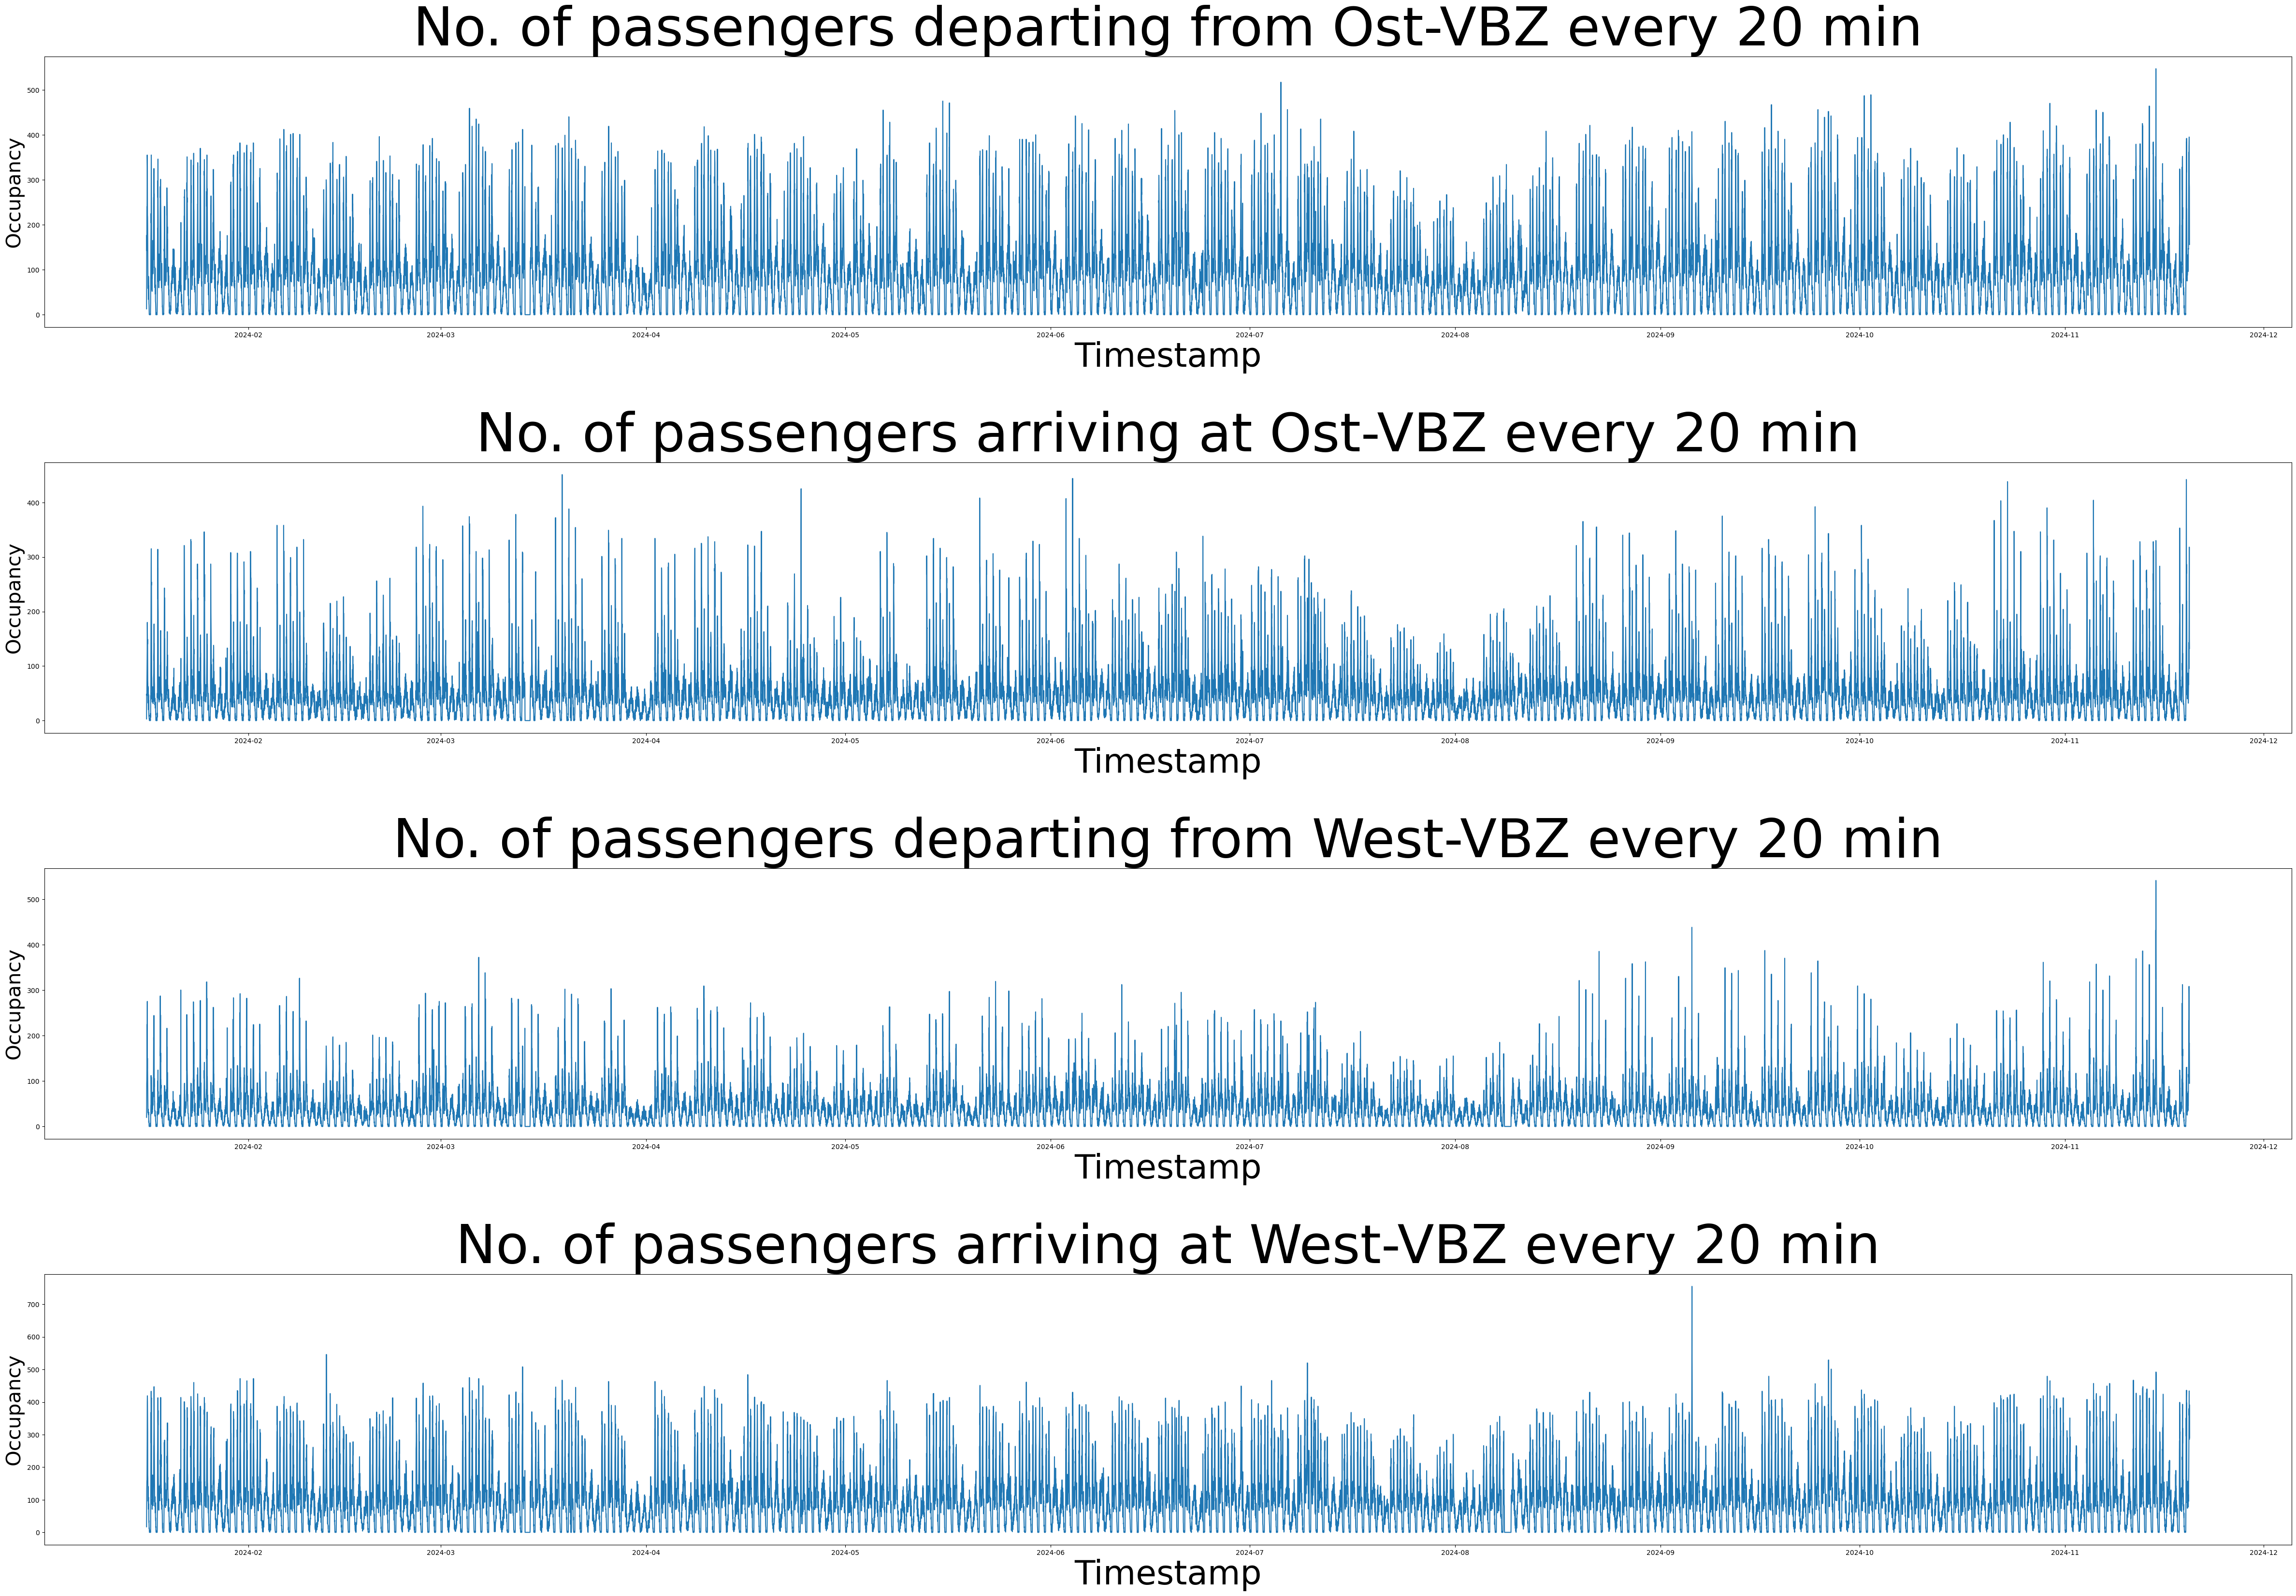

In [13]:
#Plot Time Series
#Define series 
#For Ost-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Schiffbau)
Ost_in = df_VBZ_20m[("In", "Ost-VBZ Total")]
Ost_out = df_VBZ_20m[("Out", "Ost-VBZ Total")]
#For West-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Hardplatz)
West_in = df_VBZ_20m[("In", "West-VBZ total")]
West_out = df_VBZ_20m[("Out", "West-VBZ total")]

#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m.index, Ost_in)
ax[1].plot(df_VBZ_20m.index, Ost_out)
ax[2].plot(df_VBZ_20m.index, West_in)
ax[3].plot(df_VBZ_20m.index, West_out)
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

# Time series plot for the first 5000 observations hours (Several months)

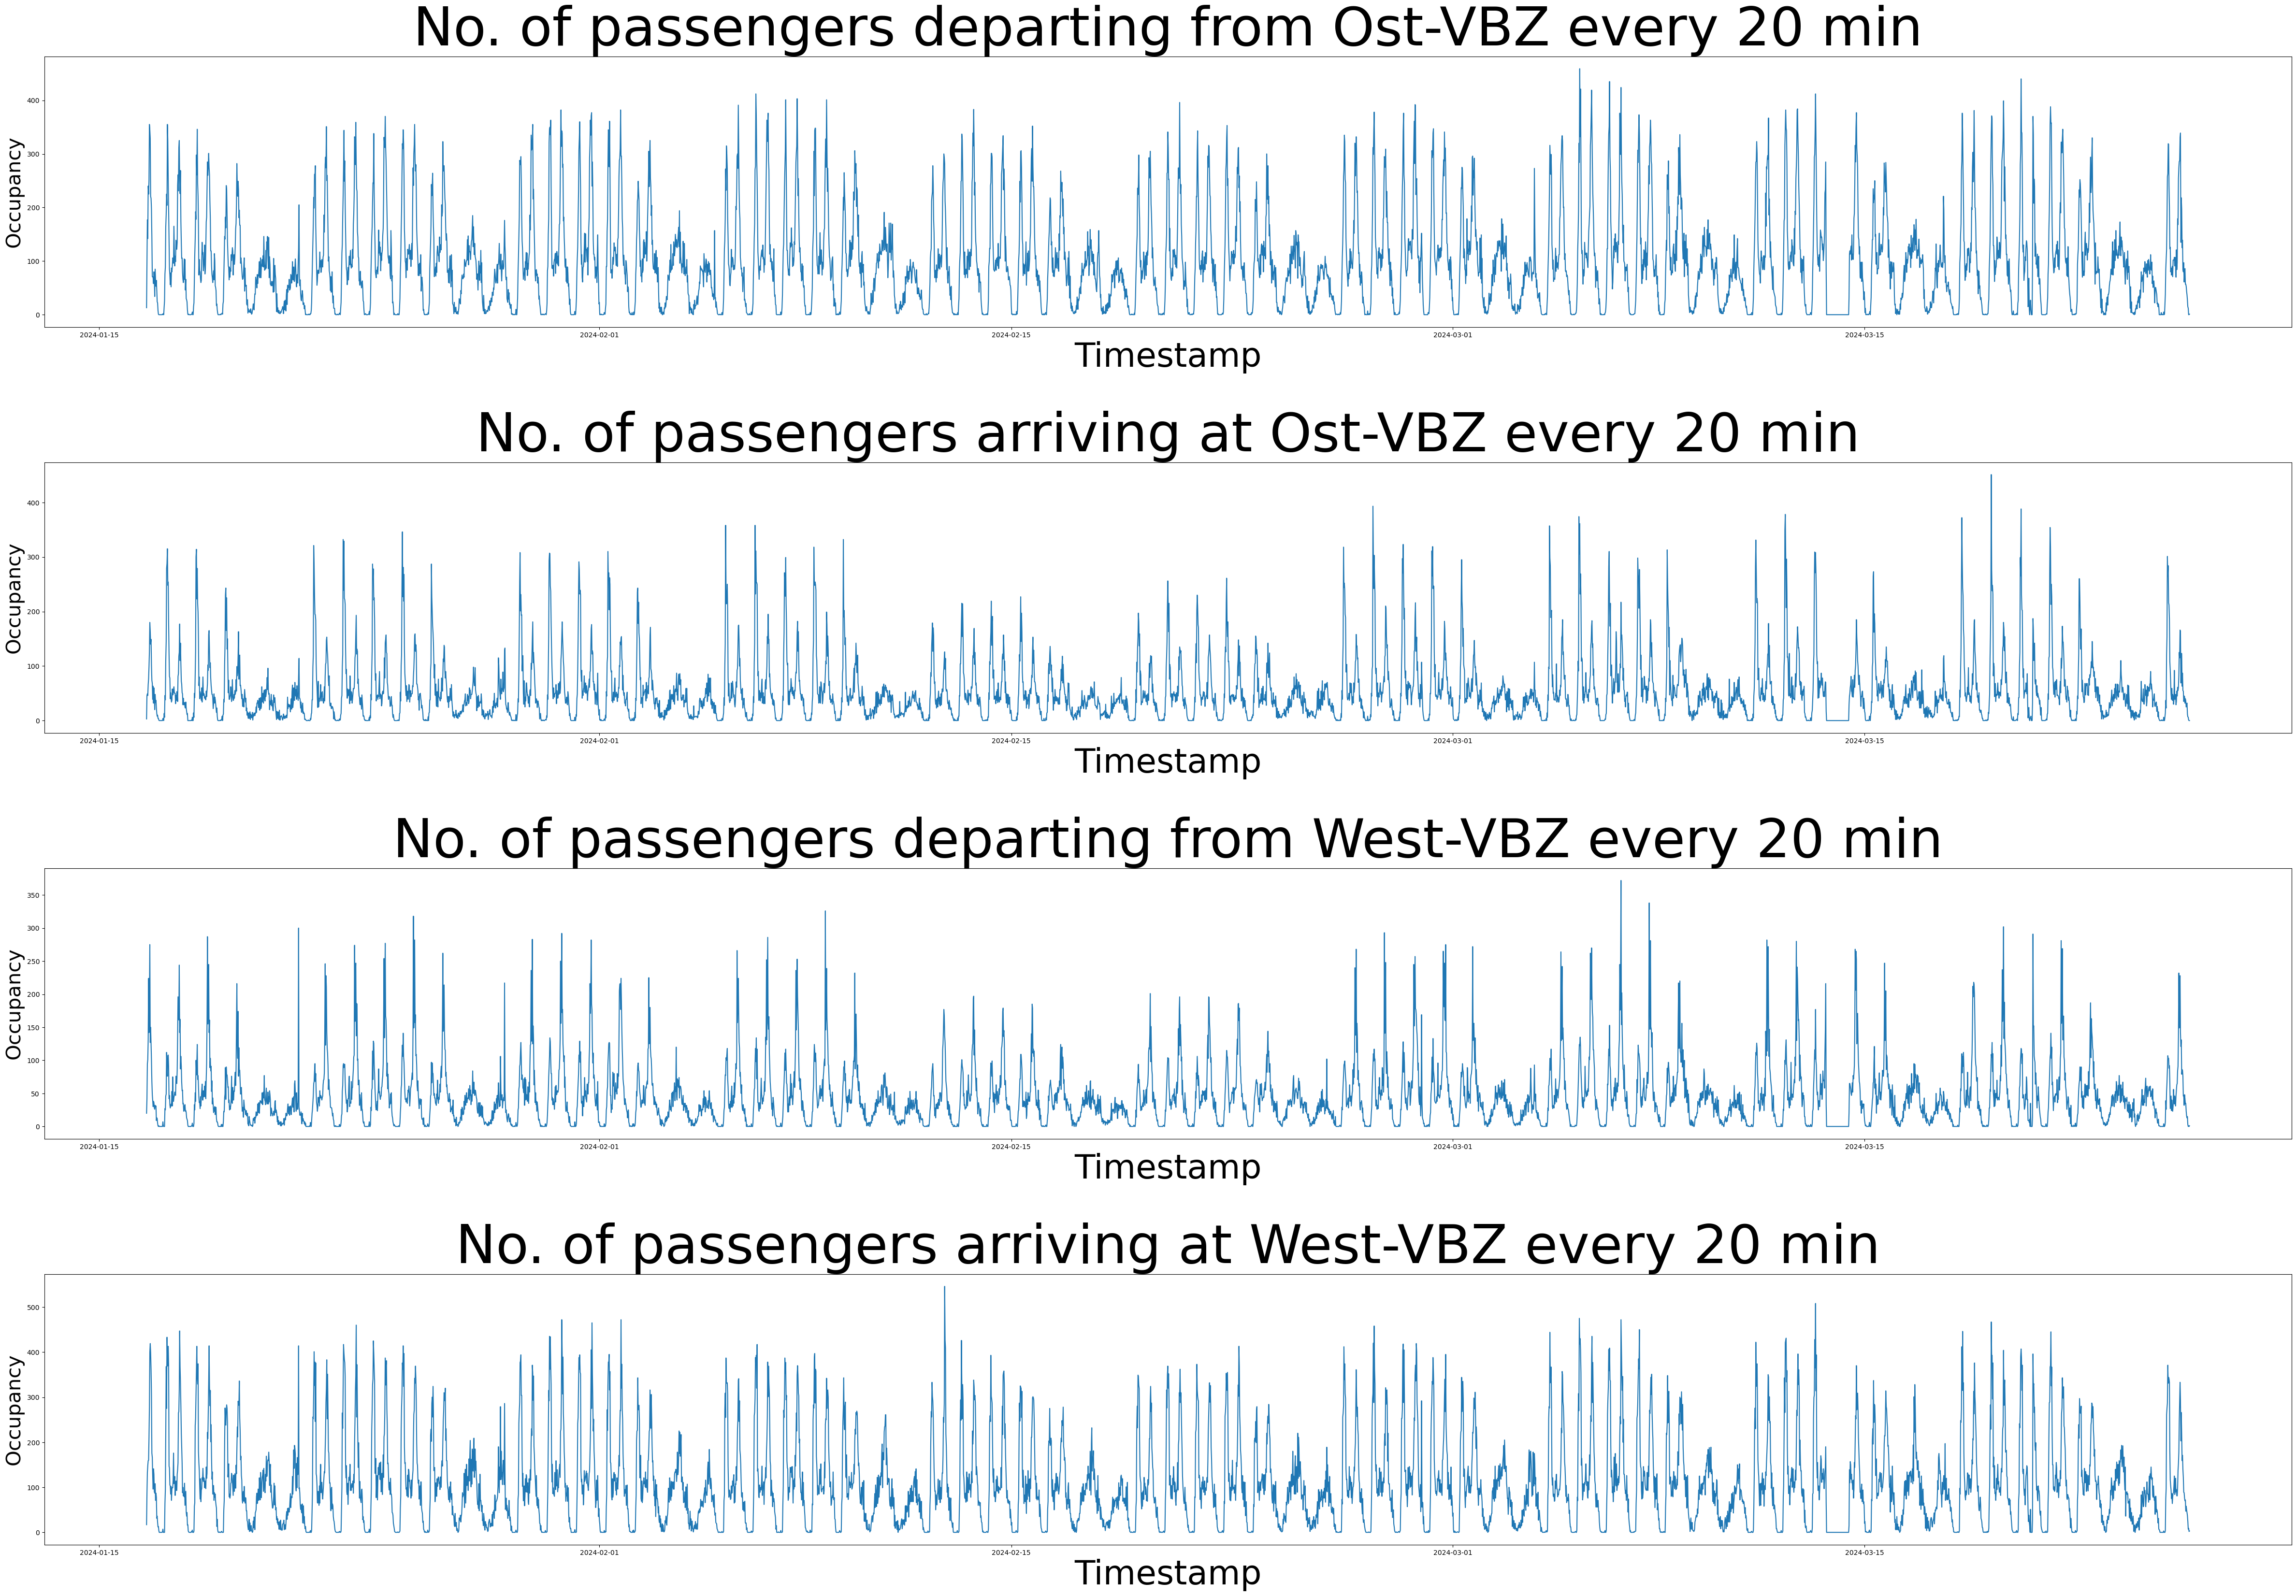

In [14]:
#Time series for only the first 5000 observations
#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m.index[:5000], Ost_in.head(5000))
ax[1].plot(df_VBZ_20m.index[:5000], Ost_out.head(5000))
ax[2].plot(df_VBZ_20m.index[:5000], West_in.head(5000))
ax[3].plot(df_VBZ_20m.index[:5000], West_out.head(5000))
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

# Time series plot for 24 hours - Occupancy of the Stations throughout a day 
Time series for (almost) the whole 2024 year or for several months are a bit difficult to read. Let's see how the occupancy changes throughout a single day

In [15]:
#Time series for 24 hours
#The previously created subsets are not dataframes, convert them first and reset index
Ost_in_df = pd.DataFrame(Ost_in)
Ost_in_df = Ost_in_df.reset_index()

Ost_out_df = pd.DataFrame(Ost_out)
Ost_out_df = Ost_out_df.reset_index()

West_in_df = pd.DataFrame(West_in)
West_in_df = West_in_df.reset_index()

West_out_df = pd.DataFrame(West_out)
West_out_df = West_out_df.reset_index()

#Select observation for only one day (17th of January 2024)
Ost_in_df[Ost_in_df["Timestamp"] == "2024-01-17 00:00:00"] #index 28
Ost_in_df[Ost_in_df["Timestamp"] == "2024-01-17 23:40:00"] #index 99

Ost_in_df_day = Ost_in_df[28:100]
Ost_out_df_day = Ost_out_df[28:100]
West_in_df_day = West_in_df[28:100]
West_out_df_day = West_out_df[28:100]

#For practicality, get rid of multindex, since it's useless here (data with only one column)
Ost_in_df_day = Ost_in_df_day.droplevel(level=0, axis=1)
Ost_in_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

Ost_out_df_day = Ost_out_df_day.droplevel(level=0, axis=1)
Ost_out_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

West_in_df_day = West_in_df_day.droplevel(level=0, axis=1)
West_in_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

West_out_df_day = West_out_df_day.droplevel(level=0, axis=1)
West_out_df_day.rename(columns = {'':'Timestamp'}, inplace = True)

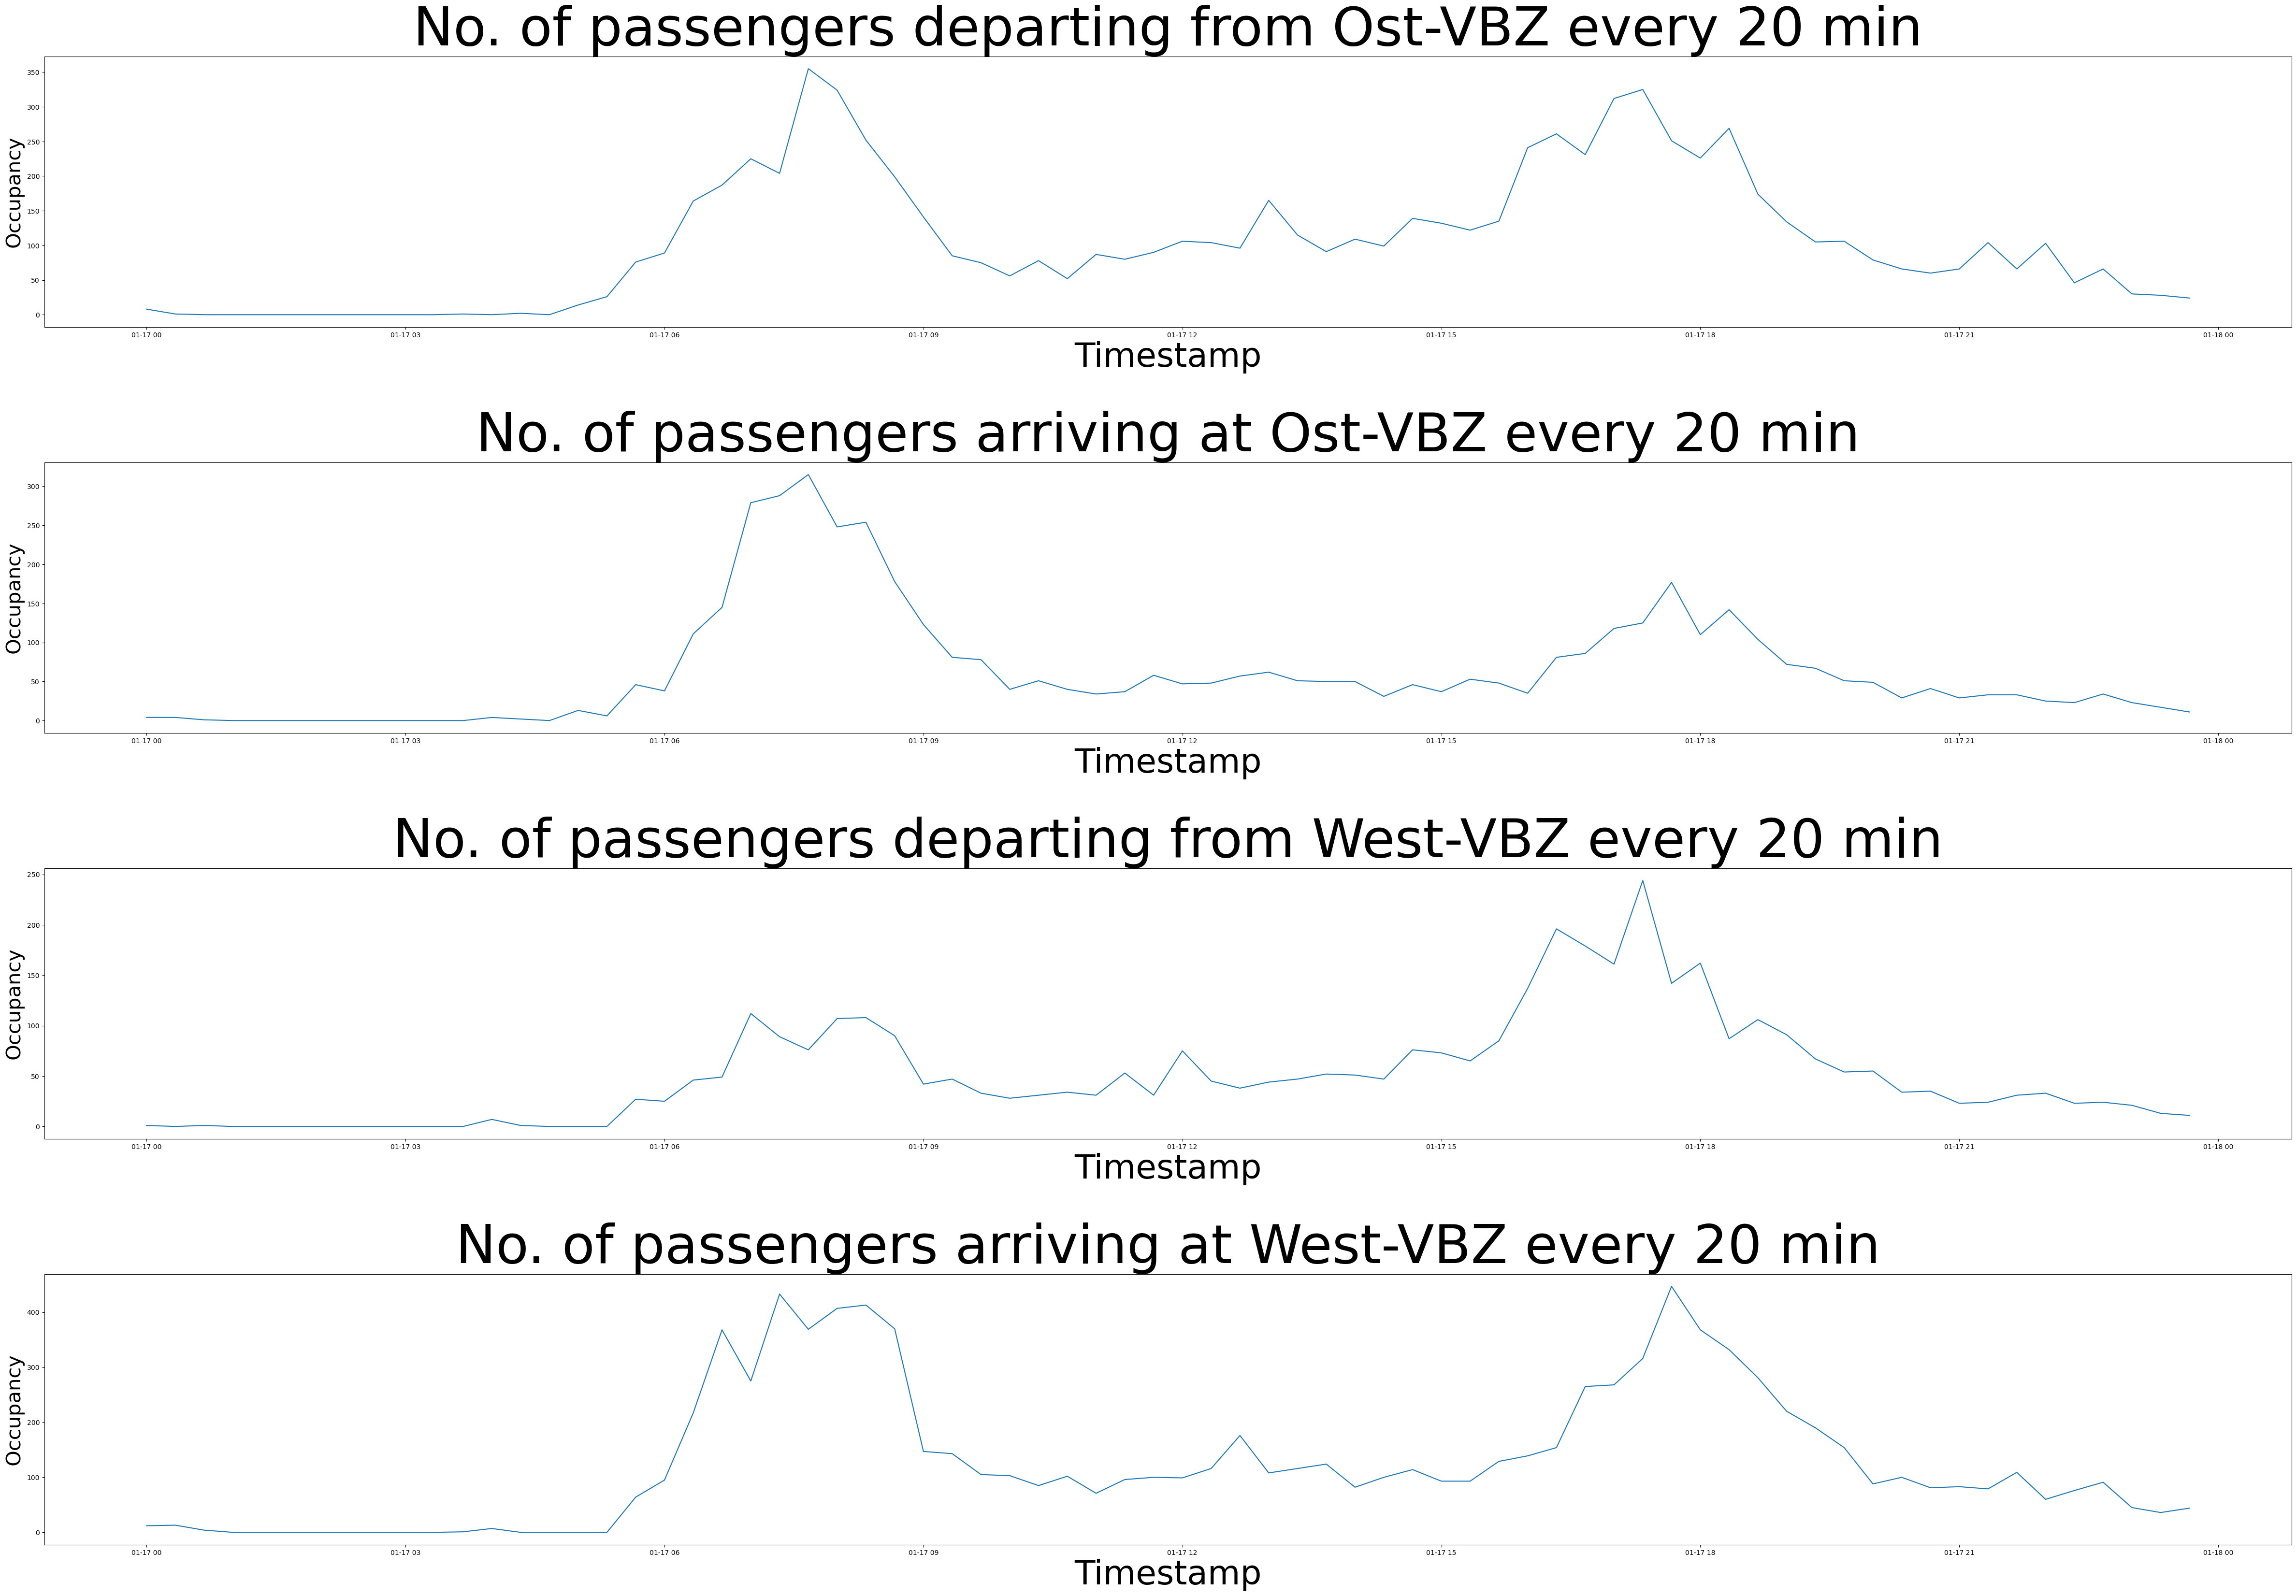

In [16]:
#Plotting time series every 24 hours
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(Ost_in_df_day["Timestamp"], Ost_in_df_day["Ost-VBZ Total"])
ax[1].plot(Ost_out_df_day["Timestamp"], Ost_out_df_day["Ost-VBZ Total"])
ax[2].plot(West_in_df_day["Timestamp"], West_in_df_day["West-VBZ total"])
ax[3].plot(West_out_df_day["Timestamp"], West_out_df_day["West-VBZ total"])
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)

## Behaviour of missing data 
We get back to the original df_VBZ dataframe where data has not been dealt with interpolation, but simply substituted by -200. We plot the series to see where missing values are located (Where missing is going to be visible by negative value). We rely on a relatively high negative number as substitute for Missing datapoints to avoid that neighboring datapoints with a positive value are going to compensate for the missing value during the data aggregation.

In [19]:
#Goal: observe behaviour of missing data through the series. Before setting a negative value for missing data, let's see the upper
#threshold the value should have, in order for neighboring observations not to bring observation value above 0 and hide missing value

#Copying df_VBZ and create dataframe with obs aggregated every 20 minutes and where Nan are substituted by 0
df_VBZ_0 = df_VBZ.copy()

df_VBZ_0.fillna(value = 0)
df_VBZ_0['Timestamp'] = pd.to_datetime(df_VBZ['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_0.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_0 = df_VBZ_20m.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes

print(df_VBZ_0.describe())

                 In                          Out               
Name  Ost-VBZ Total West-VBZ total Ost-VBZ Total West-VBZ total
count  22189.000000   22189.000000  22189.000000   22189.000000
mean      98.356483      44.739601     53.583307     104.286629
std       87.794346      45.950279     55.996915      93.996888
min        0.000000       0.000000      0.000000       0.000000
25%       27.000000      11.000000     14.000000      29.000000
50%       86.000000      36.000000     42.000000      89.000000
75%      130.000000      59.000000     67.000000     136.000000
max      547.000000     541.000000    451.000000     755.000000


In [ ]:
#Maximum value for an observation in the whole dataset is 755, consequently set substitute for NaN lower than -755

In [22]:
df_VBZ_20m_mv = df_VBZ.copy()
df_VBZ_20m_mv = df_VBZ_mv.fillna(value = -1000)

In [23]:
#Aggregating data to have observation every 20 minutes
df_VBZ_20m_mv['Timestamp'] = pd.to_datetime(df_VBZ_20m_mv['Timestamp']) #Convert Timestamp variable into datetime format
df_VBZ_20m_mv.set_index("Timestamp", inplace = True) #Set Timestamp variable as index
df_VBZ_20m_mv = df_VBZ_20m_mv.resample('20T').sum() #Aggregate observations by summing them together to have value every 20 minutes

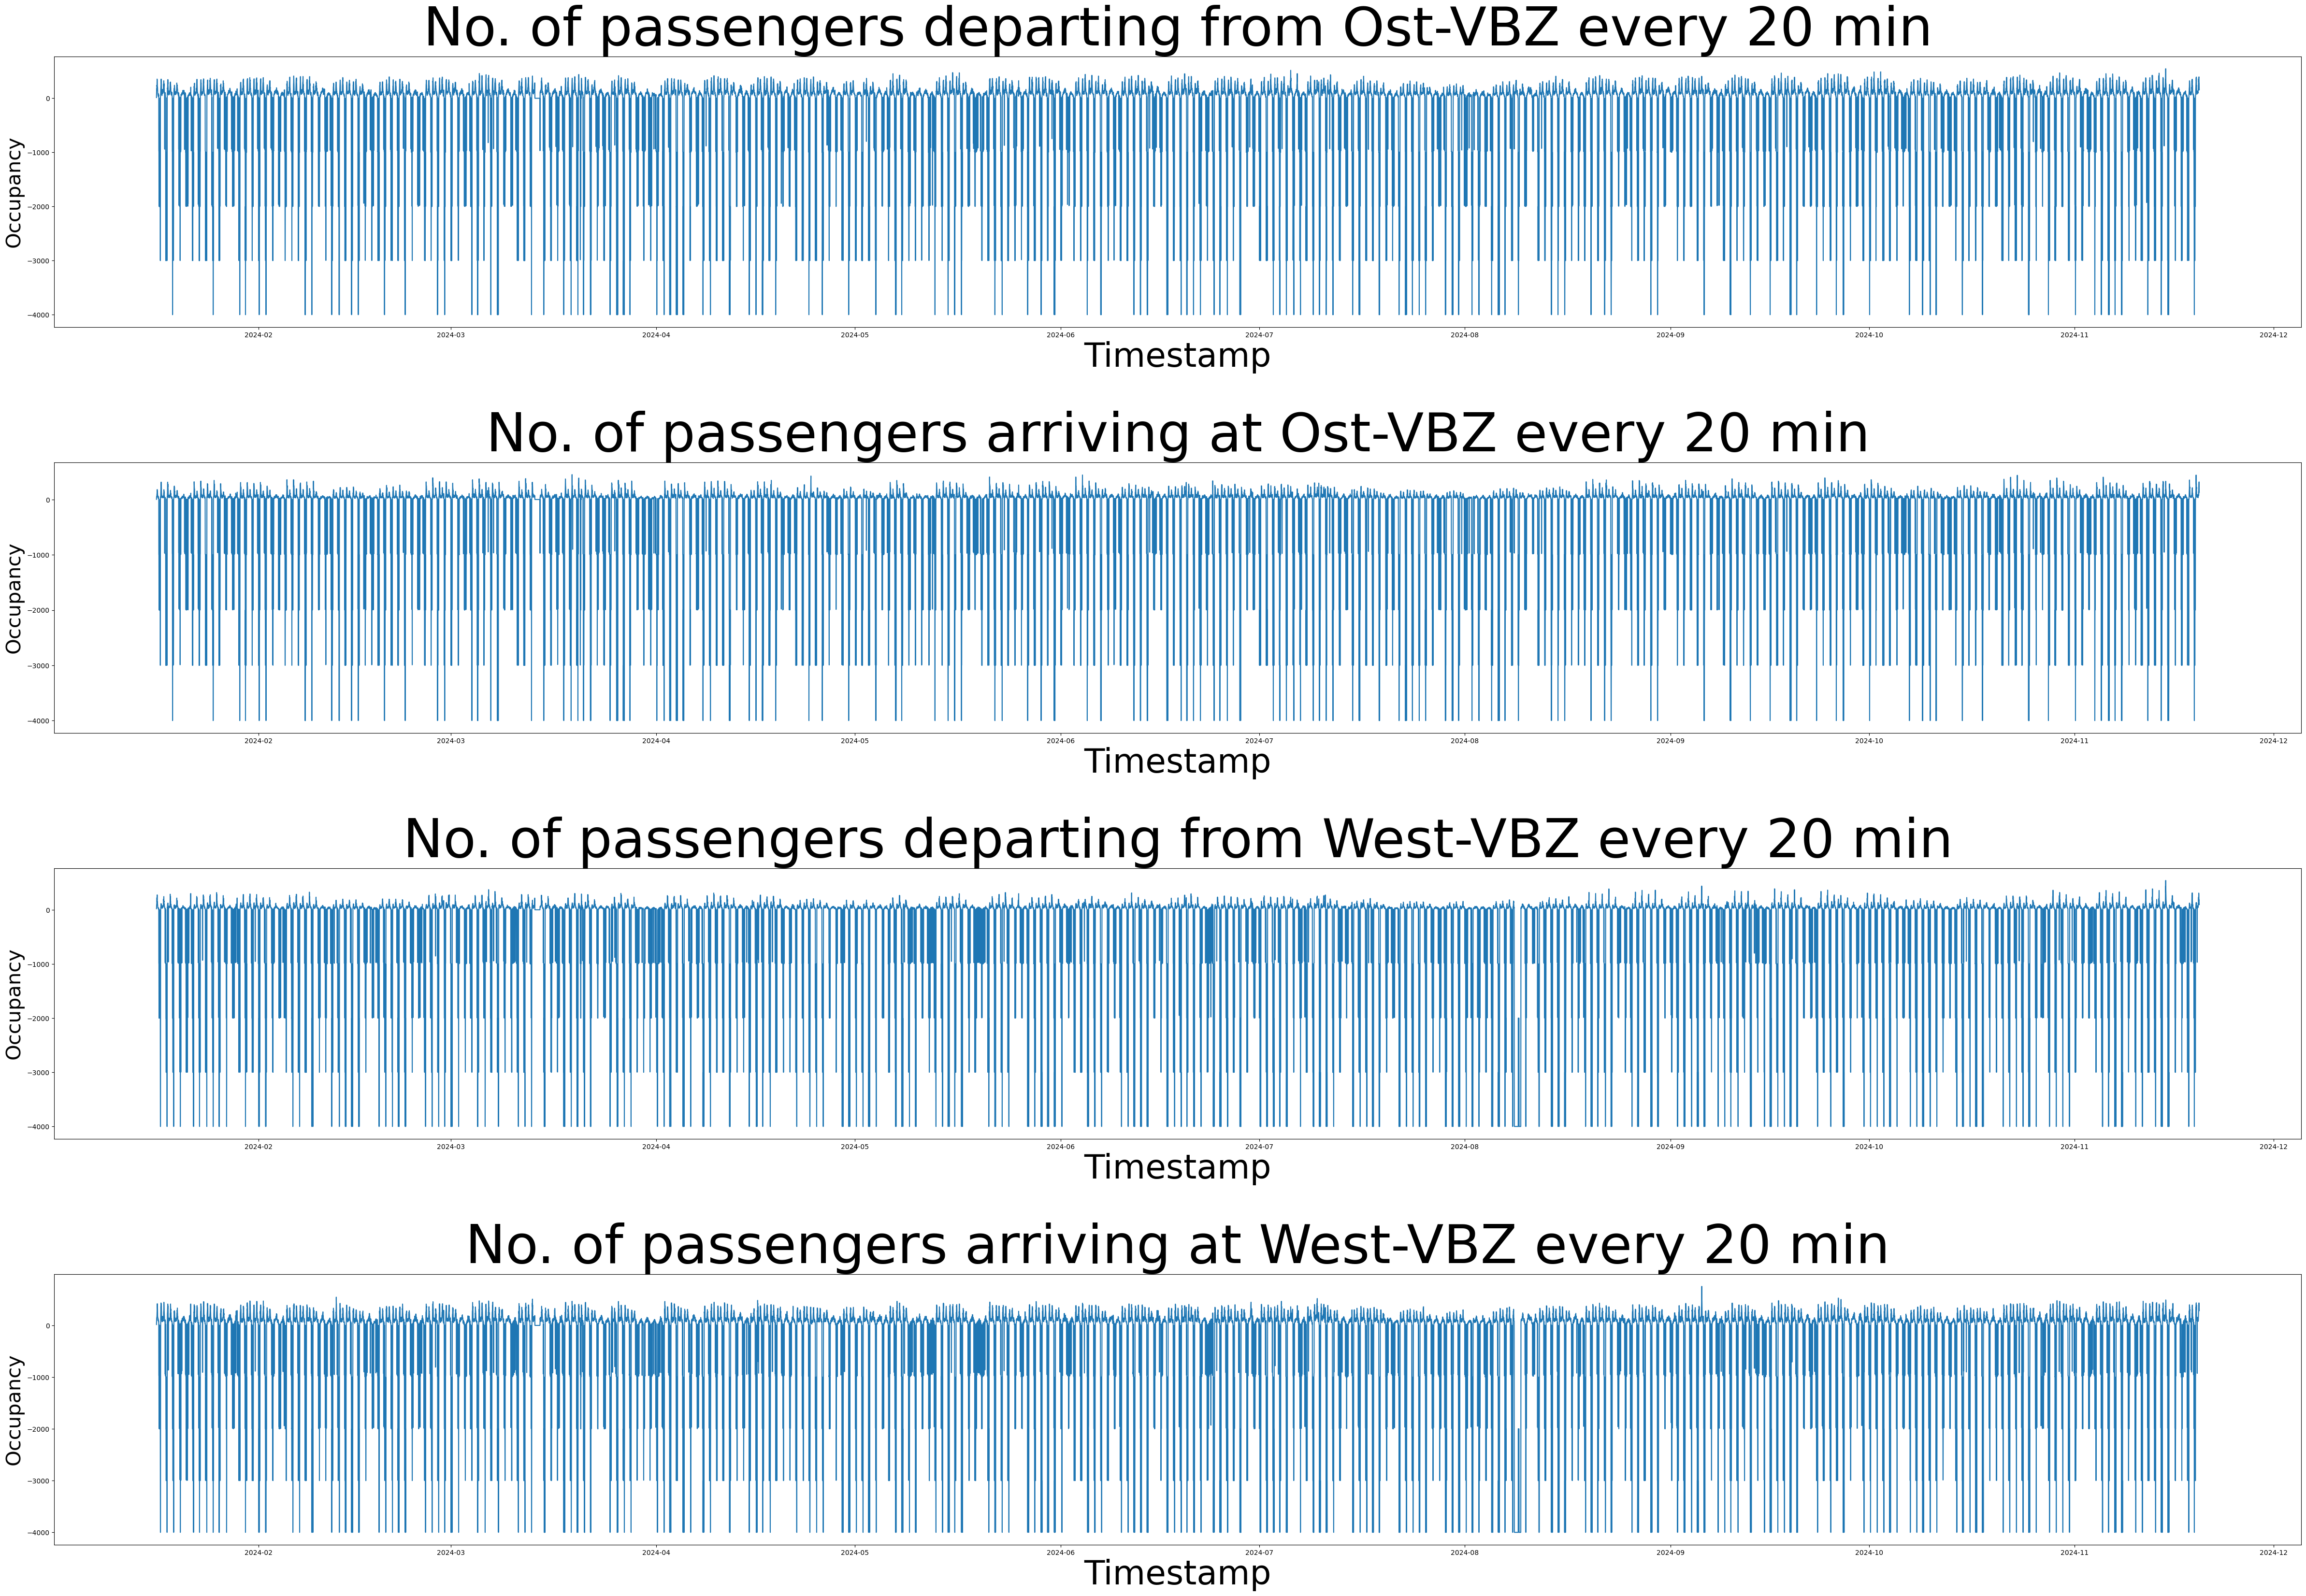

In [24]:
#Plot Time Series
#Define series 
#For Ost-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Schiffbau)
Ost_in_mv = df_VBZ_20m_mv[("In", "Ost-VBZ Total")]
Ost_out_mv = df_VBZ_20m_mv[("Out", "Ost-VBZ Total")]
#For West-VBZ (Haltestelle Hardbrücke mit Fahrtrichtung Hardplatz)
West_in_mv = df_VBZ_20m_mv[("In", "West-VBZ total")]
West_out_mv = df_VBZ_20m_mv[("Out", "West-VBZ total")]

#Plotting time series
fig, ax = plt.subplots(4,1,figsize = (60, 40))
ax[0].plot(df_VBZ_20m_mv.index, Ost_in_mv)
ax[1].plot(df_VBZ_20m_mv.index, Ost_out_mv)
ax[2].plot(df_VBZ_20m_mv.index, West_in_mv)
ax[3].plot(df_VBZ_20m_mv.index, West_out_mv)
#Labels for axis
ax[0].set_xlabel("Timestamp", fontsize = 50)
ax[0].set_ylabel("Occupancy", fontsize = 30)
ax[0].set_title("No. of passengers departing from Ost-VBZ every 20 min", fontsize = 80)

ax[1].set_xlabel("Timestamp", fontsize = 50)
ax[1].set_ylabel("Occupancy", fontsize = 30)
ax[1].set_title("No. of passengers arriving at Ost-VBZ every 20 min", fontsize = 80)

ax[2].set_xlabel("Timestamp", fontsize = 50)
ax[2].set_ylabel("Occupancy", fontsize = 30)
ax[2].set_title("No. of passengers departing from West-VBZ every 20 min", fontsize = 80)

ax[3].set_xlabel("Timestamp", fontsize = 50)
ax[3].set_ylabel("Occupancy", fontsize = 30)
ax[3].set_title("No. of passengers arriving at West-VBZ every 20 min", fontsize = 80)

plt.subplots_adjust(hspace = 0.5)